# Inverse Translatation of a Stochastic Process
Author: Lohit Vandanapu
Date: May 14, 2019

In this example, a Gaussian stochastic processes is first translated into a stocahstic processes of a different distribution and subsequently, these translated samples are translated back to Gaussian samples with InverseTranslate class.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the InverseTranslation class along with the Translation class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.stochastic_process import Translation, InverseTranslation
from UQpy.stochastic_process import SpectralRepresentation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
/opt/anaconda3/envs/UQpy_39/lib/python3.9/site-packages/beartype/_util/hint/pep/utilpeptest.py:396: BeartypeDecorHintPepDeprecatedWarning: Type hint typing.Callable deprecated by PEP 585. To resolve this, globally replace this hint by the equivalent PEP 585 type hint (e.g., "typing.List[int]" by "list[int]"). See also:
    https://www.python.org/dev/peps/pep-0585
  warn(warning_message, BeartypeDecorHintPepDeprecatedWarning)
The selected optimizer method does not support bounds and thus will be ignored.
The selected optimizer method does not support bounds and thus

Firstly we generate Gaussian Stochastic Processes using the Spectral Representation Method.

In [2]:
n_sim = 10000  # Num of samples
T = 100  # Time(1 / T = dw)
nt = 256  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nw = 128  # Num of Discretized Freq.
dt = T / nt
t = np.linspace(0, T - dt, nt)
dw = F / nw
w = np.linspace(0, F - dw, nw)
S = 125 / 4 * w ** 2 * np.exp(-5 * w)
SRM_object = SpectralRepresentation(n_sim, S, dt, dw, nt, nw, random_state=128)
samples = SRM_object.samples

In [3]:
def S_to_R(S, w, t):
    dw = w[1] - w[0]
    fac = np.ones(len(w))
    fac[1: len(w) - 1: 2] = 4
    fac[2: len(w) - 2: 2] = 2
    fac = fac * dw / 3
    R = np.zeros(len(t))
    for i in range(len(t)):
        R[i] = 2 * np.dot(fac, S * np.cos(w * t[i]))
    return R

In [4]:
R = S_to_R(S, w, t)
r = R/R[0]

We translate the samples to be Uniform samples from 1 to 2

In [5]:
from UQpy.distributions import Uniform, Lognormal

distribution = Lognormal(0.5)
samples = samples.flatten()[:, np.newaxis]

Translate_object = Translation(distributions=distribution, time_interval=dt, frequency_interval=dw,
                               number_time_intervals=nt, number_frequency_intervals=nw, correlation_function_gaussian=R,
                               samples_gaussian=samples)
samples_ng = Translate_object.samples_non_gaussian
R_ng = Translate_object.scaled_correlation_function_non_gaussian
r_ng = Translate_object.correlation_function_non_gaussian

Plotting the actual and translated autocorrelation functions

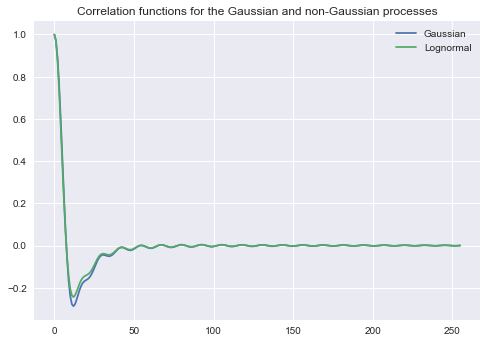

In [6]:
fig1 = plt.figure()
plt.plot(r, label='Gaussian')
plt.plot(r_ng, label='Lognormal')
plt.title('Correlation functions for the Gaussian and non-Gaussian processes')
plt.legend()
plt.show()

In [7]:
InverseTranslate_object = InverseTranslation(distributions=distribution, time_interval=dt, frequency_interval=dw,
                                             number_time_intervals=nt, number_frequency_intervals=nw,
                                             correlation_function_non_gaussian=R_ng, samples_non_gaussian=samples_ng,
                                             percentage_error=2.0)
samples_g = InverseTranslate_object.samples_gaussian
S_g = InverseTranslate_object.power_spectrum_gaussian
R_g = InverseTranslate_object.auto_correlation_function_gaussian
r_g = InverseTranslate_object.correlation_function_gaussian

/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/stochastic_process/InverseTranslation.py:119: RuntimeWarning: divide by zero encountered in true_divide
  ratio = target_S / S_ng_iterate
/Users/dimitris/PycharmProjects/dimtsap/UQpy/src/UQpy/stochastic_process/InverseTranslation.py:119: RuntimeWarning: invalid value encountered in true_divide
  ratio = target_S / S_ng_iterate


KeyboardInterrupt: 

In [ ]:
fig2 = plt.figure()
plt.plot(r_g, label='Inverse Translated')
plt.plot(r, label='Original')
plt.title('Correlation function for the original and inverse Gaussian processes')
plt.legend()
plt.show()